# Logistic regression

Adapted from [Pytorch tutorial for Deep Learning researchers](https://github.com/yunjey/pytorch-tutorial) (Yunvey Choi, 2018).

Used as part of Deep Learning, Gilles Louppe, 2018.

In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import torch 
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets
from torch.autograd import Variable

# Hyper-parameters

In [2]:
input_size = 784
num_classes = 10
num_epochs = 5
batch_size = 100
learning_rate = 0.001

# Data

In [3]:
# MNIST Dataset (Images and Labels)
train_dataset = dsets.MNIST(root='./data', 
                            train=True, 
                            transform=transforms.ToTensor(),
                            download=True)

test_dataset = dsets.MNIST(root='./data', 
                           train=False, 
                           transform=transforms.ToTensor())

# Dataset Loader (Input Pipline)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)

Processing...
Done!


In [4]:
data_iter = iter(train_loader)
X, y = data_iter.next()

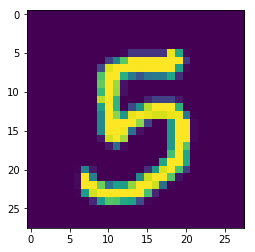

In [5]:
plt.imshow(X[0, 0])

# Model

In [9]:
# Model
class LogisticRegression(nn.Module):
    def __init__(self, input_size, num_classes):
        super(LogisticRegression, self).__init__()
        self.linear = nn.Linear(input_size, num_classes)
        self.sigmoid = nn.Sigmoid()
    
    def forward(self, x):
        out = self.linear(x)
        out = self.sigmoid(out)
        return out

model = LogisticRegression(input_size, num_classes)

In [10]:
X.view(-1, 28*28).shape

torch.Size([100, 784])

In [11]:
#model(X)
model(X.view(-1, 28*28))[0]

tensor([0.5521, 0.5725, 0.5170, 0.4237, 0.4693, 0.5068, 0.5047, 0.5111, 0.4976,
        0.5639], grad_fn=<SelectBackward>)

<div class="alert alert-success">
<b>EXERCISE</b>:

Print <code>y</code> and explain the data structure you see (type and content).

Is it consistent with what a neural network expects when dealing with a classification problem?
If not, why can we still train the model?

</div>

# Loss and optimizer

In [12]:
# Loss and Optimizer
# Softmax is internally computed.
# Set parameters to be updated.
criterion = nn.NLLLoss()  
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)  

# Training the Model
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = images.view(-1, 28*28)
        
        # Forward + Backward + Optimize
        optimizer.zero_grad()
        outputs = model(images)
        loss.backward()  # <=> x.grad += dloss/dx for all parameters x
        optimizer.step()
        
    print('Epoch: [%d/%d], Step: [%d/%d], Loss: %.4f' 
           % (epoch+1, num_epochs, i+1, len(train_dataset)//batch_size, loss))

Epoch: [1/5], Step: [600/600], Loss: -0.6595
Epoch: [2/5], Step: [600/600], Loss: -0.7523
Epoch: [3/5], Step: [600/600], Loss: -0.8326
Epoch: [4/5], Step: [600/600], Loss: -0.8744
Epoch: [5/5], Step: [600/600], Loss: -0.9000


(<matplotlib.image.AxesImage at 0x128793438>, tensor(2))

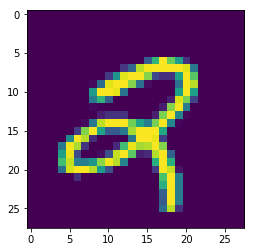

In [18]:
plt.imshow(X[4, 0]), y[4]

In [14]:
model(X[4].view(1, 784))

tensor([[0.8585, 0.7769, 0.8653, 0.8338, 0.8569, 0.8298, 0.8291, 0.8145, 0.8568,
         0.8823]], grad_fn=<SigmoidBackward>)

<div class="alert alert-success">
<b>EXERCISE</b>:

Update the code with the use of different optimizers and plot the resulting learning curves (check out tensorboard).
What do you observe in terms of convergence time?

</div>

<div class="alert alert-success">
<b>EXERCISE</b>:

Update the code above to implement gradient descent instead of stochastic gradient descent and plot the two corresponding training curves.

</div>

<div class="alert alert-success">
<b>EXERCISE</b>:

Update the structure of the architecture and the training code so that it uses the torch.nn.CrossEntropyLoss()

</div>

# Test the model

<div class="alert alert-success">
<b>EXERCISE</b>:
<ul>
    <li> Explain what it means to enter in testing mode. </li>
    <li> Why can't we directly optimize with respect to the maximum operator at training time, since this is the final objective we want to achieve. </li>
</ul>
</div>

In [ ]:
# Test the Model
correct = 0
total = 0

for images, labels in test_loader:
    images = images.view(-1, 28*28)
    outputs = model(images)
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum()
    
print('Accuracy of the model on the 10000 test images: %d %%' % (100 * correct / total))

<div class="alert alert-success">
<b>EXERCISE</b>:
    
Now monitor the behavior on both training and testing set at learning time.

</div>